In [1]:
from pydriller import Repository
import pandas as pd

In [5]:
df = pd.DataFrame(columns=['old_file_path', 'new_file_path', 'commit SHA', 'parent commit SHA', 'commit message', 'diff_myers', 'diff_hist'])

In [6]:
def process_commit(commit):
    parents = [par[:7] for par in commit.parents]
    for file in commit.modified_files:
        

        df.loc[len(df)] = [
            file.old_path,
            file.new_path,
            commit.hash[:7],
            parents,
            commit.msg,
            file.diff_parsed,
            ""
        ]

for commit in Repository('https://github.com/ansys/pyfluent', skip_whitespaces=True).traverse_commits():
    process_commit(commit)

#for histogram
for commit in Repository('https://github.com/ansys/pyfluent', histogram_diff=True, skip_whitespaces=True).traverse_commits():
    for file in commit.modified_files:
        if file.old_path and file.new_path:
            diff_hist = file.diff_parsed
            df.loc[(df['old_file_path'] == file.old_path) & (df['new_file_path'] == file.new_path) & (df['commit SHA'] == commit.hash[:7]), 'diff_hist'] = str(diff_hist)


In [7]:
#save the df as csv
df.to_csv('ansys_pyfluent_data_analysis.csv', index=False)

In [8]:
df2 = pd.DataFrame(columns=['old_file_path', 'new_file_path', 'commit SHA', 'parent commit SHA', 'commit message', 'diff_myers', 'diff_hist', 'Discrepancy'])
df = pd.read_csv('ansys_pyfluent_data_analysis.csv')
for index, row in df.iterrows():
    if row['diff_myers'] != row['diff_hist']:
        df2.loc[len(df2)] = [
            row['old_file_path'],
            row['new_file_path'],
            row['commit SHA'],
            row['parent commit SHA'],
            row['commit message'],
            row['diff_myers'],
            row['diff_hist'],
            "Yes"
        ]
    else:
        df2.loc[len(df2)] = [
            row['old_file_path'],
            row['new_file_path'],
            row['commit SHA'],
            row['parent commit SHA'],
            row['commit message'],
            row['diff_myers'],
            row['diff_hist'],
            "No"
        ]

df2.to_csv('ansys_pyfluent_data_analysis_discrepancy.csv', index=False)

In [9]:
df2['Discrepancy'].value_counts()

Discrepancy
No     7621
Yes    5787
Name: count, dtype: int64

In [10]:
with open('ansys_pyfluent_data_analysis_discrepancy.csv', 'r') as f:
    reader = f.readlines()
    for line in reader[:5]:
        print(line)

old_file_path,new_file_path,commit SHA,parent commit SHA,commit message,diff_myers,diff_hist,Discrepancy

,.gitignore,d5af427,[],Initial commit,"{'added': [(1, '# Byte-compiled / optimized / DLL files'), (2, '__pycache__/'), (3, '*.py[cod]'), (4, '*$py.class'), (5, ''), (6, '# C extensions'), (7, '*.so'), (8, ''), (9, '# Distribution / packaging'), (10, '.Python'), (11, 'build/'), (12, 'develop-eggs/'), (13, 'dist/'), (14, 'downloads/'), (15, 'eggs/'), (16, '.eggs/'), (17, 'lib/'), (18, 'lib64/'), (19, 'parts/'), (20, 'sdist/'), (21, 'var/'), (22, 'wheels/'), (23, 'pip-wheel-metadata/'), (24, 'share/python-wheels/'), (25, '*.egg-info/'), (26, '.installed.cfg'), (27, '*.egg'), (28, 'MANIFEST'), (29, ''), (30, '# PyInstaller'), (31, '#  Usually these files are written by a python script from a template'), (32, '#  before PyInstaller builds the exe, so as to inject date/other infos into it.'), (33, '*.manifest'), (34, '*.spec'), (35, ''), (36, '# Installer logs'), (37, 'pip-log.txt'), (38

In [11]:
df2.shape

(13408, 8)

In [12]:
df = pd.DataFrame(columns=['old_file_path', 'new_file_path', 'commit SHA', 'parent commit SHA', 'commit message', 'diff_myers', 'diff_hist'])
def process_commit(commit):
    parents = [par[:7] for par in commit.parents]
    for file in commit.modified_files:
        

        df.loc[len(df)] = [
            file.old_path,
            file.new_path,
            commit.hash[:7],
            parents,
            commit.msg,
            file.diff_parsed,
            ""
        ]

for commit in Repository('https://github.com/alandtse/alexa_media_player', skip_whitespaces=True).traverse_commits():
    process_commit(commit)

#for histogram
for commit in Repository('https://github.com/alandtse/alexa_media_player', histogram_diff=True, skip_whitespaces=True).traverse_commits():
    for file in commit.modified_files:
        if file.old_path and file.new_path:
            diff_hist = file.diff_parsed
            df.loc[(df['old_file_path'] == file.old_path) & (df['new_file_path'] == file.new_path) & (df['commit SHA'] == commit.hash[:7]), 'diff_hist'] = str(diff_hist)

df.to_csv('alexa_media_player_data_analysis.csv', index=False)


df2 = pd.DataFrame(columns=['old_file_path', 'new_file_path', 'commit SHA', 'parent commit SHA', 'commit message', 'diff_myers', 'diff_hist', 'Discrepancy'])
df = pd.read_csv('alexa_media_player_data_analysis.csv')
for index, row in df.iterrows():
    if row['diff_myers'] != row['diff_hist']:
        df2.loc[len(df2)] = [
            row['old_file_path'],
            row['new_file_path'],
            row['commit SHA'],
            row['parent commit SHA'],
            row['commit message'],
            row['diff_myers'],
            row['diff_hist'],
            "Yes"
        ]
    else:
        df2.loc[len(df2)] = [
            row['old_file_path'],
            row['new_file_path'],
            row['commit SHA'],
            row['parent commit SHA'],
            row['commit message'],
            row['diff_myers'],
            row['diff_hist'],
            "No"
        ]

df2.to_csv('alexa_media_player_data_analysis_discrepancy.csv', index=False)

In [13]:
with open('alexa_media_player_data_analysis_discrepancy.csv', 'r') as f:
    reader = f.readlines()
    for line in reader[:5]:
        print(line)

old_file_path,new_file_path,commit SHA,parent commit SHA,commit message,diff_myers,diff_hist,Discrepancy

,.gitignore,027f1bc,[],Initial commit,"{'added': [(1, '# Byte-compiled / optimized / DLL files'), (2, '__pycache__/'), (3, '*.py[cod]'), (4, '*$py.class'), (5, ''), (6, '# C extensions'), (7, '*.so'), (8, ''), (9, '# Distribution / packaging'), (10, '.Python'), (11, 'build/'), (12, 'develop-eggs/'), (13, 'dist/'), (14, 'downloads/'), (15, 'eggs/'), (16, '.eggs/'), (17, 'lib/'), (18, 'lib64/'), (19, 'parts/'), (20, 'sdist/'), (21, 'var/'), (22, 'wheels/'), (23, '*.egg-info/'), (24, '.installed.cfg'), (25, '*.egg'), (26, 'MANIFEST'), (27, ''), (28, '# PyInstaller'), (29, '#  Usually these files are written by a python script from a template'), (30, '#  before PyInstaller builds the exe, so as to inject date/other infos into it.'), (31, '*.manifest'), (32, '*.spec'), (33, ''), (34, '# Installer logs'), (35, 'pip-log.txt'), (36, 'pip-delete-this-directory.txt'), (37, ''), (38, '# Unit 

In [14]:
df = pd.DataFrame(columns=['old_file_path', 'new_file_path', 'commit SHA', 'parent commit SHA', 'commit message', 'diff_myers', 'diff_hist'])
def process_commit(commit):
    parents = [par[:7] for par in commit.parents]
    for file in commit.modified_files:
        

        df.loc[len(df)] = [
            file.old_path,
            file.new_path,
            commit.hash[:7],
            parents,
            commit.msg,
            file.diff_parsed,
            ""
        ]

for commit in Repository('https://github.com/abetlen/llama-cpp-python', skip_whitespaces=True).traverse_commits():
    process_commit(commit)

#for histogram
for commit in Repository('https://github.com/abetlen/llama-cpp-python', histogram_diff=True, skip_whitespaces=True).traverse_commits():
    for file in commit.modified_files:
        if file.old_path and file.new_path:
            diff_hist = file.diff_parsed
            df.loc[(df['old_file_path'] == file.old_path) & (df['new_file_path'] == file.new_path) & (df['commit SHA'] == commit.hash[:7]), 'diff_hist'] = str(diff_hist)

df.to_csv('llama_cpp_python_data_analysis.csv', index=False)


df2 = pd.DataFrame(columns=['old_file_path', 'new_file_path', 'commit SHA', 'parent commit SHA', 'commit message', 'diff_myers', 'diff_hist', 'Discrepancy'])
df = pd.read_csv('llama_cpp_python_data_analysis.csv')
for index, row in df.iterrows():
    if row['diff_myers'] != row['diff_hist']:
        df2.loc[len(df2)] = [
            row['old_file_path'],
            row['new_file_path'],
            row['commit SHA'],
            row['parent commit SHA'],
            row['commit message'],
            row['diff_myers'],
            row['diff_hist'],
            "Yes"
        ]
    else:
        df2.loc[len(df2)] = [
            row['old_file_path'],
            row['new_file_path'],
            row['commit SHA'],
            row['parent commit SHA'],
            row['commit message'],
            row['diff_myers'],
            row['diff_hist'],
            "No"
        ]

df2.to_csv('llama_cpp_python_data_analysis_discrepancy.csv', index=False)

In [15]:
with open('llama_cpp_python_data_analysis_discrepancy.csv', 'r') as f:
    reader = f.readlines()
    for line in reader[:5]:
        print(line)

old_file_path,new_file_path,commit SHA,parent commit SHA,commit message,diff_myers,diff_hist,Discrepancy

,.gitignore,79b304c,[],Initial commit,"{'added': [(1, '.envrc'), (2, ''), (3, 'models/'), (4, ''), (5, '# Byte-compiled / optimized / DLL files'), (6, '__pycache__/'), (7, '*.py[cod]'), (8, '*$py.class'), (9, ''), (10, '# C extensions'), (11, '*.so'), (12, ''), (13, '# Distribution / packaging'), (14, '.Python'), (15, 'build/'), (16, 'develop-eggs/'), (17, 'dist/'), (18, 'downloads/'), (19, 'eggs/'), (20, '.eggs/'), (21, 'lib/'), (22, 'lib64/'), (23, 'parts/'), (24, 'sdist/'), (25, 'var/'), (26, 'wheels/'), (27, 'share/python-wheels/'), (28, '*.egg-info/'), (29, '.installed.cfg'), (30, '*.egg'), (31, 'MANIFEST'), (32, ''), (33, '# PyInstaller'), (34, '#  Usually these files are written by a python script from a template'), (35, '#  before PyInstaller builds the exe, so as to inject date/other infos into it.'), (36, '*.manifest'), (37, '*.spec'), (38, ''), (39, '# Installer logs'), 

In [16]:
df2.shape

(2750, 8)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Successfully loaded and combined all three data files.
Total modified files analyzed: 18572


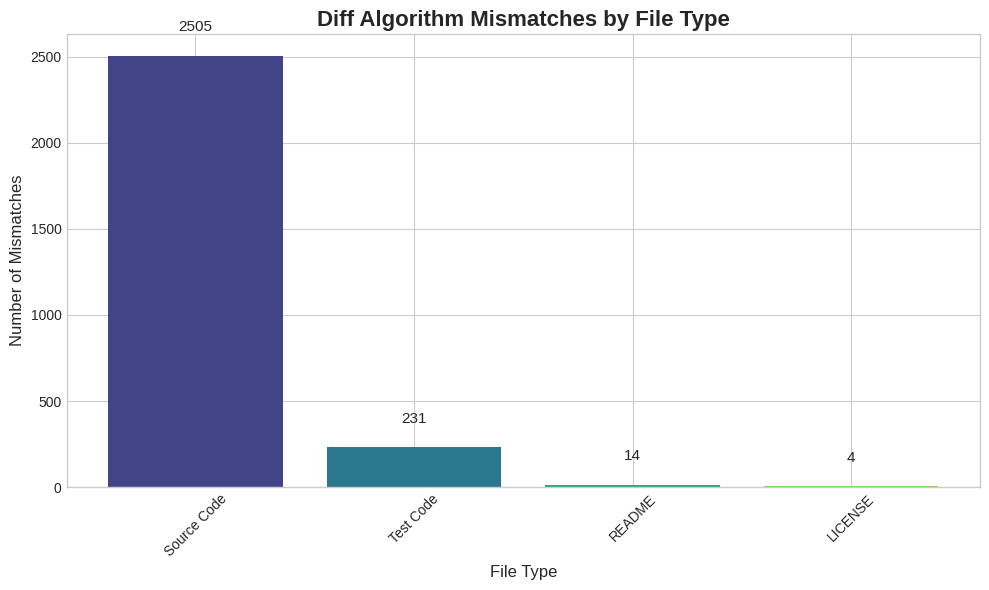


Final Mismatch Statistics:
file_type
Other          3467
Source Code    2505
Test Code       231
README           14
LICENSE           4
Name: count, dtype: int64


In [ ]:

df1 = pd.read_csv('ansys_pyfluent_data_analysis_discrepancy.csv')
df2 = pd.read_csv('alexa_media_player_data_analysis_discrepancy.csv')
df3 = pd.read_csv('llama_cpp_python_data_analysis_discrepancy.csv')

combined_df = pd.concat([df1, df2, df3], ignore_index=True)
print("Successfully loaded and combined all three data files.")
print(f"Total modified files analyzed: {len(combined_df)}")


def categorize_file(filepath):
    """Categorizes a file based on its path."""
    if not isinstance(filepath, str):
        return 'Other' 
    
    lower_path = filepath.lower()
    
    if 'license' in lower_path:
        return 'LICENSE'
    if 'readme.md' in lower_path:
        return 'README'
    if 'test' in lower_path:
        return 'Test Code'
    if lower_path.endswith(('.py', '.js', '.java', '.c', '.cpp', '.h')):
        return 'Source Code'
    
    return 'Other'


if not combined_df.empty:
    combined_df['file_type'] = combined_df['new_file_path'].apply(categorize_file)

    # Filter for rows where there was a discrepancy
    mismatches_df = combined_df[combined_df['Discrepancy'] == 'Yes'].copy()

    # Count mismatches by file type
    mismatch_counts = mismatches_df['file_type'].value_counts()

    # --- Plotting the Results ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 6))

    categories = ['Source Code', 'Test Code', 'README', 'LICENSE']
    counts = [mismatch_counts.get(cat, 0) for cat in categories]

    bars = ax.bar(categories, counts, color=sns.color_palette("viridis", len(categories)))

    ax.set_title('Diff Algorithm Mismatches by File Type', fontsize=16, fontweight='bold')
    ax.set_xlabel('File Type', fontsize=12)
    ax.set_ylabel('Number of Mismatches', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    # Add count labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05 * max(counts), 
                f'{int(yval)}', ha='center', va='bottom', fontsize=11)

    plt.tight_layout()
    plt.show()

    # Print the exact counts
    print("\nFinal Mismatch Statistics:")
    print(mismatch_counts)